In [125]:
import pandas as pd
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [48]:
final_csv = "~/Work/Data/fond-compact-asp/output/final.csv"
interim_csv = "~/Work/Data/fond-compact-asp/output/interim.csv"
df_final = pd.read_csv(final_csv)
interim_csv = pd.read_csv(interim_csv)

In [65]:
df = df_final.pivot_table(index=['scenario', 'instance'], columns='solver')
df.columns = df.columns.to_series().str.join('_').str.replace("-","_")
df.dropna(inplace=True)
df

ground_time_asp  ground_time_fondsat  solve_time_asp  \
scenario   instance                                                         
acrobatics p01                 0.025             0.021560            0.00   
           p02                 0.120             0.238316            0.01   
           p03                 2.461             3.083144            2.02   
           p04                55.214            49.537284         1022.15   
beam-walk  p01                 0.051             0.085638            0.00   
...                              ...                  ...             ...   
zenotravel p01                 0.165             0.658917            0.00   
           p02                33.480            69.252778          628.98   
           p03                42.411           110.145747         2995.91   
           p04                24.533            92.937031          250.32   
           p05                44.343           185.114145          968.94   

                     solve_time_fondsat  states_asp  states_fondsat  \
scenario   instance                                                   
acrobatics p01                 0.016998         4.0             4.0   
           p02                 0.075464         8.0             8.0   
           p03                 2.973693        16.0            16.0   
           p04              2877.180939        32.0            32.0   
beam-walk  p01                 0.103413         8.0             8.0   
...                                 ...         ...             ...   
zenotravel p01                 0.041617         3.0             3.0   
           p02                14.346458        17.0            17.0   
           p03                17.820161        17.0            17.0   
           p04                 4.838916        13.0            13.0   
           p05                11.901231        15.0            15.0   

                     total_time_asp  total_time_fondsat  
scenario   instance                                      
acrobatics p01                0.025            0.309835  
           p02                0.130            0.422486  
           p03                4.481            6.857003  
           p04             1077.364         2950.735288  
beam-walk  p01                0.051            0.554193  
...                             ...                 ...  
zenotravel p01                0.165            3.163903  
           p02              662.460           93.917932  
           p03             3038.321          143.370946  
           p04              274.853          114.689861  
           p05             1013.283          224.790687  

[308 rows x 8 columns]

### Sanity check
The number of states in a controller should be same for ASP and FondSat

In [66]:
df.query("states_asp != states_fondsat")

,,ground_time_asp,ground_time_fondsat,solve_time_asp,solve_time_fondsat,states_asp,states_fondsat,total_time_asp,total_time_fondsat
scenario,instance,,,,,,,,


### Pre-processing
Exclude instances where FondSat took less than 0.5s. This will exclude any effects from noise and division by zero.

In [137]:
df=df.query("total_time_fondsat>0.5")

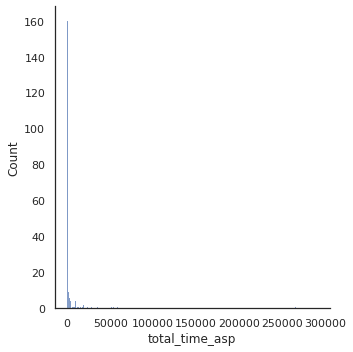

In [138]:
sns.displot(df["total_time_asp"]);

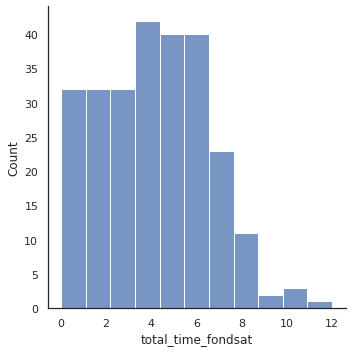

In [139]:
sns.displot(np.log(df["total_time_fondsat"]))

/home/nitin/Tools/Virtualenvs/nb/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_time_asp', ylabel='Density'>

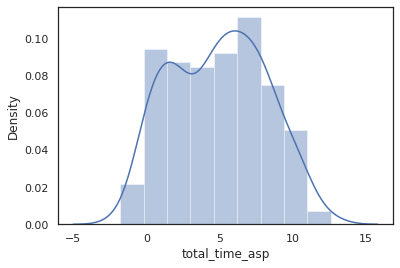

In [140]:
sns.distplot(np.log(df["total_time_asp"]))

### Compute additional metrics
To compare ASP with FondSat we compute the ratio $r=\frac{ASP Time}{SAT Time}$. If, for an instance, $r<1$ then ASP was faster than SAT, and if $r>1$ then SAT was faster than ASP.

In [71]:
df["total_r"] = df["total_time_asp"]/df["total_time_fondsat"]
df["ground_r"] = df["ground_time_asp"]/df["ground_time_fondsat"]
df["solve_r"] = df["solve_time_asp"]/df["solve_time_fondsat"]

### Plot the metrics

<AxesSubplot:xlabel='total_r', ylabel='Count'>

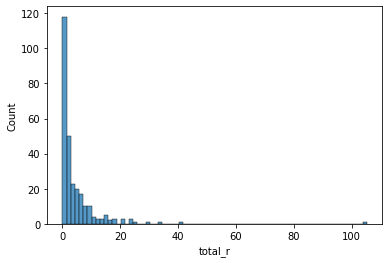

In [73]:
sns.histplot(df['total_r'])

#### Plot the log for a better perspective

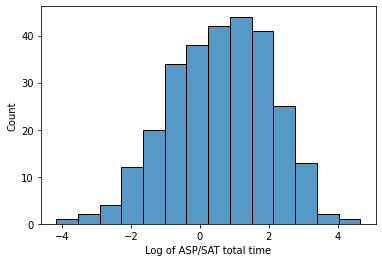

In [92]:
sns.histplot(np.log(df['total_r']))
plt.xlabel("Log of ASP/SAT total time");

<AxesSubplot:xlabel='ground_r', ylabel='Count'>

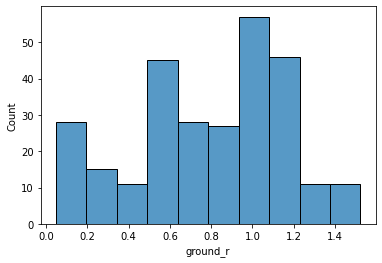

In [86]:
sns.histplot(df['ground_r'])

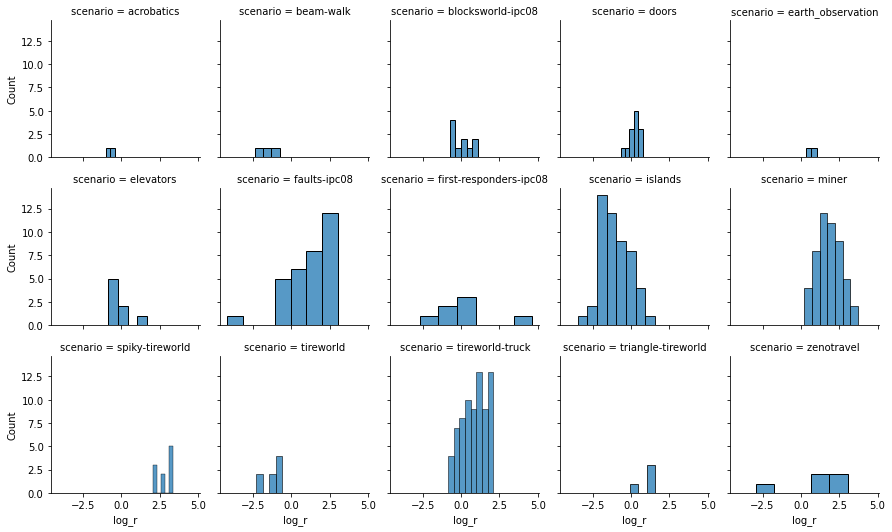

In [104]:
df["log_r"] = np.log(df["total_r"])
g = sns.FacetGrid(df.reset_index(), col="scenario", height=2.5, col_wrap=5)
g.map(sns.histplot, "log_r");

In [78]:
df.query("total_r<=1")

ground_time_asp  ground_time_fondsat  \
scenario           instance                                         
acrobatics         p03                 2.461             3.083144   
                   p04                55.214            49.537284   
beam-walk          p01                 0.051             0.085638   
                   p02                 0.549             0.943825   
                   p03                 9.373            13.641831   
...                                      ...                  ...   
tireworld-truck    p58                 0.927             1.479313   
                   p59                 1.442             2.314561   
                   p72                22.006            19.061411   
triangle-tireworld p02                 1.466             1.930405   
zenotravel         p01                 0.165             0.658917   

                             solve_time_asp  solve_time_fondsat  states_asp  \
scenario           instance                                                   
acrobatics         p03                 2.02            2.973693        16.0   
                   p04              1022.15         2877.180939        32.0   
beam-walk          p01                 0.00            0.103413         8.0   
                   p02                 0.35            0.604567        16.0   
                   p03               339.74         1261.718337        32.0   
...                                     ...                 ...         ...   
tireworld-truck    p58                 1.10            1.789327        14.0   
                   p59                 7.82            8.479183        16.0   
                   p72             29901.36        29949.205286        23.0   
triangle-tireworld p02                 5.57            5.213993        16.0   
zenotravel         p01                 0.00            0.041617         3.0   

                             states_fondsat  total_time_asp  \
scenario           instance                                   
acrobatics         p03                 16.0           4.481   
                   p04                 32.0        1077.364   
beam-walk          p01                  8.0           0.051   
                   p02                 16.0           0.899   
                   p03                 32.0         349.113   
...                                     ...             ...   
tireworld-truck    p58                 14.0           2.027   
                   p59                 16.0           9.262   
                   p72                 23.0       29923.366   
triangle-tireworld p02                 16.0           7.036   
zenotravel         p01                  3.0           0.165   

                             total_time_fondsat   total_r  ground_r   solve_r  
scenario           instance                                                    
acrobatics         p03                 6.857003  0.653492  0.798211  0.679290  
                   p04              2950.735288  0.365117  1.114595  0.355261  
beam-walk          p01                 0.554193  0.092026  0.595528  0.000000  
                   p02                 1.922966  0.467507  0.581676  0.578927  
                   p03              1289.822414  0.270667  0.687078  0.269268  
...                                         ...       ...       ...       ...  
tireworld-truck    p58                 3.669984  0.552318  0.626642  0.614756  
                   p59                11.477781  0.806950  0.623012  0.922259  
                   p72             29975.004368  0.998277  1.154479  0.998402  
triangle-tireworld p02                 7.637661  0.921224  0.759426  1.068279  
zenotravel         p01                 3.163903  0.052151  0.250411  0.000000  

[95 rows x 11 columns]

In [83]:
df.query(f"total_r>100")

,,ground_time_asp,ground_time_fondsat,solve_time_asp,solve_time_fondsat,states_asp,states_fondsat,total_time_asp,total_time_fondsat,total_r,ground_r,solve_r
scenario,instance,,,,,,,,,,,
first-responders-ipc08,p103,36.261,75.566409,28281.3,182.909131,14.0,14.0,28317.561,269.22297,105.182559,0.479856,154.6194
